In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gyanashish/healthcare-diabetes")

print("Path to dataset files:", path)

/home/skitarii/PycharmProjects/mipt-masters/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8.94k/8.94k [00:00<00:00, 11.4MB/s]

Extracting files...
Path to dataset files: /home/skitarii/.cache/kagglehub/datasets/gyanashish/healthcare-diabetes/versions/1


In [2]:
%pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [8]:
path

'/home/skitarii/.cache/kagglehub/datasets/gyanashish/healthcare-diabetes/versions/1'

In [9]:
!ls -la /home/skitarii/.cache/kagglehub/datasets/gyanashish/healthcare-diabetes/versions/1

total 32
drwxrwxr-x 2 skitarii skitarii  4096 фев 17 19:35  .
drwxrwxr-x 3 skitarii skitarii  4096 фев 17 19:35  ..
-rw-rw-r-- 1 skitarii skitarii 23873 фев 17 19:35 'health care diabetes.csv'


In [5]:
import pandas as pd

In [30]:
df = pd.read_csv(path + "/health care diabetes.csv")

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.shape

(768, 9)

# Task 1

In [45]:
df = pd.read_csv(path + "/health care diabetes.csv")

diabetes_fraction = df['Outcome'].sum() / len(df)
print(f"Fraction of patients with diabetes: {diabetes_fraction:.2f}")

Fraction of patients with diabetes: 0.35


# Task 2

In [48]:
df = pd.read_csv(path + "/health care diabetes.csv")

# Предобработка: в данных для некоторых признаков (например, BloodPressure) значение 0 является ошибочным,
# поэтому заменим 0 на NaN и удалим такие строки для корректного расчёта.
df['BloodPressure'].replace(0, pd.NA, inplace=True)
df.dropna(subset=['BloodPressure'], inplace=True)

# Рассчитаем среднее значение кровяного давления для двух групп:
# для пациентов с диабетом (Outcome == 1) и для здоровых пациентов (Outcome == 0)
mean_bp_diabetic = df[df['Outcome'] == 1]['BloodPressure'].mean()
mean_bp_healthy  = df[df['Outcome'] == 0]['BloodPressure'].mean()

# Вычислим модуль разности между средними значениями
abs_difference = abs(mean_bp_diabetic - mean_bp_healthy)

# Округлим результат до сотых
result = round(abs_difference, 2)

print(result)


4.44


/tmp/ipykernel_122705/4200669663.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BloodPressure'].replace(0, pd.NA, inplace=True)


In [49]:
df = pd.read_csv(path + "/health care diabetes.csv")

# Замена 0 в столбце 'BloodPressure' на NaN (так как 0 недопустимо)
df['BloodPressure'].replace(0, np.nan, inplace=True)

# Импутируем пропуски средним значением по не-нулевым значениям столбца
impute_value = df['BloodPressure'].mean()  # среднее вычисляется по наблюдениям, где значение не NaN
df['BloodPressure'].fillna(impute_value, inplace=True)

# Рассчитаем среднее значение кровяного давления для больных (Outcome==1) и здоровых (Outcome==0)
mean_bp_diabetic = df[df['Outcome'] == 1]['BloodPressure'].mean()
mean_bp_healthy  = df[df['Outcome'] == 0]['BloodPressure'].mean()

# Вычислим абсолютную разность между средними
abs_difference = abs(mean_bp_diabetic - mean_bp_healthy)

# Округляем до сотых
result = round(abs_difference, 2)

print(result)

4.21


/tmp/ipykernel_122705/4119331431.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BloodPressure'].replace(0, np.nan, inplace=True)


In [28]:
# Замена нулевых значений в 'BloodPressure' на NaN, так как 0 физиологически недопустимо
df['BloodPressure'].replace(0, np.nan, inplace=True)

# Импутация пропущенных значений средним по столбцу (вычисляется по оставшимся наблюдениям)
impute_value = df['BloodPressure'].mean()
df['BloodPressure'].fillna(impute_value, inplace=True)

# Рассчитываем среднее значение кровяного давления для больных (Outcome==1) и здоровых (Outcome==0)
mean_bp_diabetic = df[df['Outcome'] == 1]['BloodPressure'].mean()
mean_bp_healthy  = df[df['Outcome'] == 0]['BloodPressure'].mean()

# Вычисляем абсолютную разность между средними
abs_difference = abs(mean_bp_diabetic - mean_bp_healthy)

# Округляем результат до сотых
result = round(abs_difference, 2)

print(result)

4.21


In [37]:
df = pd.read_csv(path + "/health care diabetes.csv")

# Замена нулевых значений в столбце 'BloodPressure' на NaN
df['BloodPressure'].replace(0, np.nan, inplace=True)

# Удаляем строки с пропущенными значениями в BloodPressure
df.dropna(subset=['BloodPressure'], inplace=True)

# Вычисляем среднее значение кровяного давления для больных (Outcome==1) и здоровых (Outcome==0)
mean_bp_diabetic = df[df['Outcome'] == 1]['BloodPressure'].mean()
mean_bp_healthy  = df[df['Outcome'] == 0]['BloodPressure'].mean()

# Вычисляем абсолютную разность между средними
abs_difference = abs(mean_bp_diabetic - mean_bp_healthy)

# Округляем результат до сотых
result = round(abs_difference, 2)

print(result)

4.44


/tmp/ipykernel_122705/1841286540.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BloodPressure'].replace(0, np.nan, inplace=True)


In [57]:
df = pd.read_csv(path + "/health care diabetes.csv")


# Вычисление среднего кровяного давления для больных (Outcome==1) и здоровых (Outcome==0)
# При этом все строки (включая объекты с BloodPressure равным 0) учитываются
mean_bp_diabetic = df[df['Outcome'] == 1]['BloodPressure'].mean()
mean_bp_healthy  = df[df['Outcome'] == 0]['BloodPressure'].mean()

# Вычисляем абсолютную разность между средними значениями
abs_diff = abs(mean_bp_diabetic - mean_bp_healthy)

# Округляем результат до сотых
result = round(abs_diff, 2)
print(result)


2.64


# Task 3

In [16]:
import numpy as np

In [17]:
# Определим список нецелевых признаков (без столбца 'Outcome')
features = [col for col in df.columns if col != 'Outcome']

# Вычисляем корреляционную матрицу по абсолютным значениям
corr_matrix = df[features].corr().abs()

# Чтобы не учитывать самокорреляцию, установим диагональные элементы в 0
np.fill_diagonal(corr_matrix.values, 0)

# Найдем пару признаков с максимальным коэффициентом корреляции
max_pair = corr_matrix.unstack().idxmax()
max_value = corr_matrix.unstack().max()

# Извлечем названия признаков и отсортируем их в алфавитном порядке
informative_pair = sorted(list(max_pair))

# Выведем результаты
print("Максимальный коэффициент корреляции:", round(max_value, 2))
print("Пара признаков:", informative_pair)
print("Ответ:", " ".join(informative_pair))


Максимальный коэффициент корреляции: 0.56
Пара признаков: ['Age', 'Pregnancies']
Ответ: Age Pregnancies


# Task 4

In [18]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Определяем признаки (без целевого столбца 'Outcome') и целевую переменную
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Рассчитываем взаимную информацию для каждого признака
mi = mutual_info_classif(X, y, random_state=0)

# Создаем Series для удобства анализа
mi_series = pd.Series(mi, index=X.columns)

# Выводим взаимную информацию для каждого признака (в порядке убывания значений)
print(mi_series.sort_values(ascending=False))

# Находим признак с максимальной взаимной информацией
max_feature = mi_series.idxmax()
print("Признак с максимальной взаимной информацией:", max_feature)

Glucose                     0.115847
Pregnancies                 0.074825
BMI                         0.069931
Age                         0.058658
Insulin                     0.048791
DiabetesPedigreeFunction    0.018086
BloodPressure               0.011734
SkinThickness               0.011221
dtype: float64
Признак с максимальной взаимной информацией: Glucose


# Task 5

In [50]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

df = pd.read_csv(path + "/health care diabetes.csv")

# Разделим данные на признаки и целевую переменную
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Разделим данные на обучающую и тестовую выборки (80:20), random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определим параметрическую сетку для GridSearchCV:
# число ближайших соседей от 3 до 20 включительно и метрики 'minkowski', 'euclidean', 'cosine'
param_grid = {
    'n_neighbors': list(range(3, 21)),
    'metric': ['minkowski', 'euclidean', 'cosine']
}

# Определим схему кросс-валидации: 5-fold KFold с перемешиванием и random_state=42
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Создадим модель KNN
knn = KNeighborsClassifier()

# Настроим GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Выведем подобранные гиперпараметры
best_params = grid_search.best_params_
print("Лучшие гиперпараметры:", best_params)

# Форматируем ответ: сначала метрика, затем число ближайших соседей, через пробел
answer = f"{best_params['metric']} {best_params['n_neighbors']}"
print("Ответ:", answer)


Лучшие гиперпараметры: {'metric': 'minkowski', 'n_neighbors': 11}
Ответ: minkowski 11


In [51]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

# Загрузка датасета
df = pd.read_csv(path + "/health care diabetes.csv")

# Определение признаков и целевой переменной
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Разделение данных на обучающую и тестовую выборки в соотношении 80:20, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Параметрическая сетка для GridSearchCV:
param_grid = {
    'n_neighbors': list(range(3, 21)),  # от 3 до 20 включительно
    'metric': ['minkowski', 'euclidean', 'cosine']
}

# Настраиваем кросс-валидацию: KFold с перемешиванием и random_state=42
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Создаем модель KNN
knn = KNeighborsClassifier()

# Подбор гиперпараметров с помощью GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Получаем лучшие гиперпараметры
best_params = grid_search.best_params_
print("Лучшие гиперпараметры:", best_params)

# Форматируем ответ: сначала метрика, затем оптимальное число соседей через пробел
answer = f"{best_params['metric']} {best_params['n_neighbors']}"
print("Ответ:", answer)


Лучшие гиперпараметры: {'metric': 'minkowski', 'n_neighbors': 11}
Ответ: minkowski 11


# Task 6

In [52]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, roc_auc_score

df = pd.read_csv(path + "/health care diabetes.csv")

# Определение признаков и целевой переменной
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Разделение данных: тестовая выборка составляет 33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Используем оптимальные гиперпараметры, подобранные ранее:
# metric = 'minkowski', n_neighbors = 11
knn = KNeighborsClassifier(n_neighbors=11, metric='minkowski')

# Обучение модели
knn.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]  # вероятность класса "1"

# Получение метрик с помощью classification_report (с макроусреднением)
report = classification_report(y_test, y_pred, output_dict=True)

accuracy = report['accuracy']
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1 = report['macro avg']['f1-score']

# Расчет AUC ROC
auc = roc_auc_score(y_test, y_proba)

# Округление метрик до сотых
accuracy, precision, recall, f1, auc = map(lambda x: round(x, 2), [accuracy, precision, recall, f1, auc])

# Вывод результатов в одной строке через пробел
print(f"{accuracy} {precision} {recall} {f1} {auc}")


0.72 0.69 0.66 0.67 0.76


In [55]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# Загрузка датасета
df = pd.read_csv(path + "/health care diabetes.csv")

# Определение признаков и целевой переменной
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Разделение данных: тестовая выборка составляет 33% от исходной, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Обучение модели KNN с оптимальными гиперпараметрами: n_neighbors=11, metric='minkowski'
knn = KNeighborsClassifier(n_neighbors=11, metric='minkowski')
knn.fit(X_train, y_train)

# Предсказание классов и получение вероятностей для положительного класса
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]

# Расчет метрик через classification_report (с макроусреднением)
report = classification_report(y_test, y_pred, output_dict=True)
accuracy = report['accuracy']
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1 = report['macro avg']['f1-score']

# Расчет AUC ROC
auc = roc_auc_score(y_test, y_proba)

# Округление метрик до сотых
accuracy = round(accuracy, 2)
precision = round(precision, 2)
recall = round(recall, 2)
f1 = round(f1, 2)
auc = round(auc, 2)

# Вывод результатов в требуемом формате: accuracy precision recall f1-score AUC ROC
print(f"{accuracy} {precision} {recall} {f1} {auc}")

0.72 0.69 0.66 0.67 0.76


# Task 7

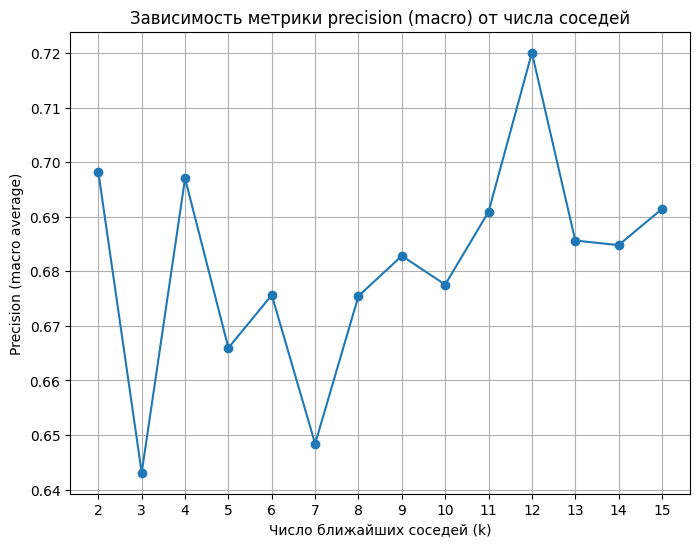

Оптимальное число ближайших соседей по метрике macro precision: 12


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Загрузка датасета
df = pd.read_csv(path + "/health care diabetes.csv")

# Определение признаков и целевой переменной
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Разделение данных: тестовая выборка составляет 33%, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Список значений k от 2 до 15 включительно
k_values = range(2, 16)
precision_scores = []

# Перебор значений k и оценка метрики precision (macro average) на тестовой выборке
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Получаем отчет с метриками
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_macro = report['macro avg']['precision']
    precision_scores.append(precision_macro)

# Построение графика изменения метрики precision при увеличении числа соседей
plt.figure(figsize=(8,6))
plt.plot(list(k_values), precision_scores, marker='o', linestyle='-')
plt.xlabel('Число ближайших соседей (k)')
plt.ylabel('Precision (macro average)')
plt.title('Зависимость метрики precision (macro) от числа соседей')
plt.xticks(list(k_values))
plt.grid(True)
plt.show()

# Определение оптимального числа соседей (k), при котором macro precision максимальна
optimal_k = list(k_values)[np.argmax(precision_scores)]
print("Оптимальное число ближайших соседей по метрике macro precision:", optimal_k)


# Task 8

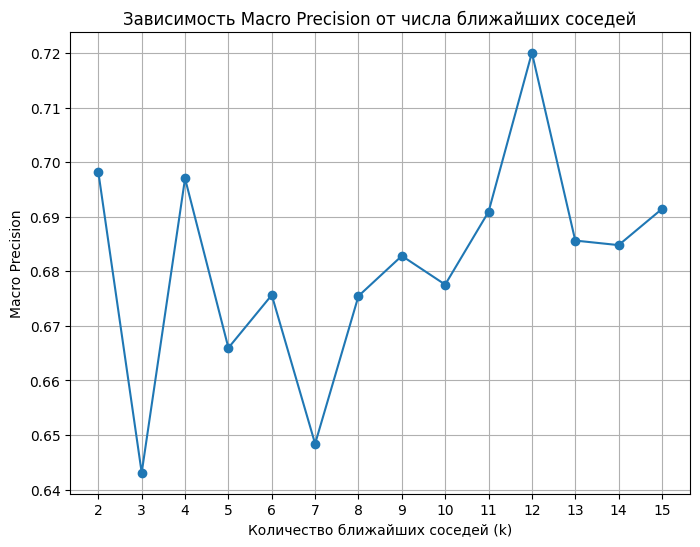

Оптимальное число ближайших соседей по macro f1-score: 9


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Загрузим датасет
df = pd.read_csv(path + "/health care diabetes.csv")

# Определим признаки и целевую переменную
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Разделение данных: тестовая выборка составляет 33% от данных, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Итерируем значение k от 2 до 15
k_values = list(range(2, 16))
precision_scores = []
f1_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    # Получаем метрики через classification_report с макроусреднением
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_macro = report['macro avg']['precision']
    f1_macro = report['macro avg']['f1-score']
    precision_scores.append(precision_macro)
    f1_scores.append(f1_macro)

# Построение графика изменения метрики precision (macro average)
plt.figure(figsize=(8,6))
plt.plot(k_values, precision_scores, marker='o', linestyle='-')
plt.xlabel('Количество ближайших соседей (k)')
plt.ylabel('Macro Precision')
plt.title('Зависимость Macro Precision от числа ближайших соседей')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Определяем оптимальное число соседей по метрике macro f1-score
optimal_k = k_values[np.argmax(f1_scores)]
print("Оптимальное число ближайших соседей по macro f1-score:", optimal_k)


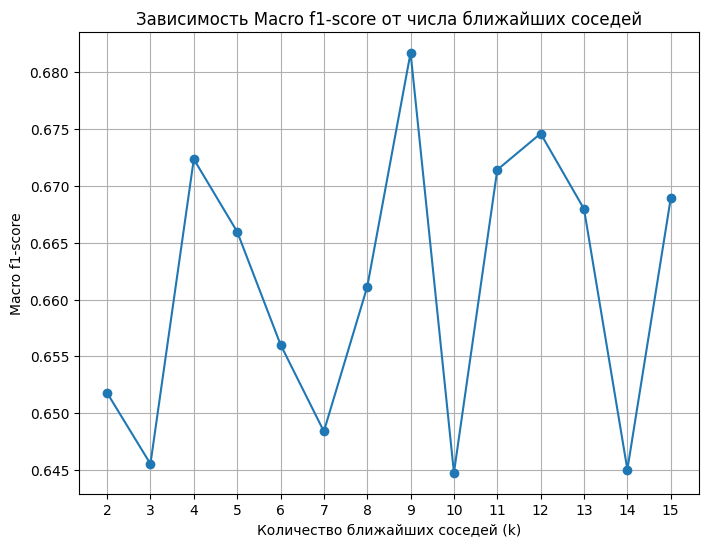

Оптимальное число ближайших соседей по метрике macro f1-score: 9


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Загрузка датасета
df = pd.read_csv(path + "/health care diabetes.csv")

# Определение признаков и целевой переменной
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Разделение данных: тестовая выборка 33% от данных, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Диапазон значений k от 2 до 15 включительно
k_values = list(range(2, 16))
f1_scores = []

# Перебор значений k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    # Получаем отчет с метриками; берем f1-score с макроусреднением
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_macro = report['macro avg']['f1-score']
    f1_scores.append(f1_macro)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(k_values, f1_scores, marker='o', linestyle='-')
plt.xlabel('Количество ближайших соседей (k)')
plt.ylabel('Macro f1-score')
plt.title('Зависимость Macro f1-score от числа ближайших соседей')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Определяем оптимальное значение k (на тестовой выборке)
optimal_k = k_values[np.argmax(f1_scores)]
print("Оптимальное число ближайших соседей по метрике macro f1-score:", optimal_k)


# Task 9

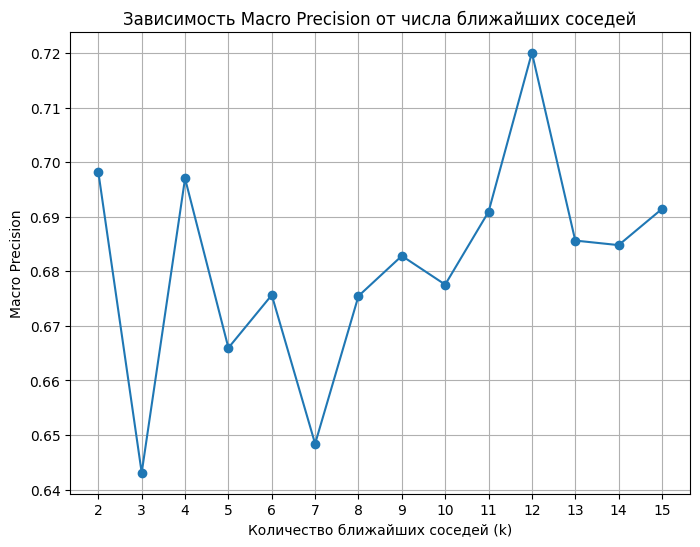

Оптимальное число ближайших соседей по метрике macro recall: 9


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Определяем признаки и целевую переменную
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Разделение данных: тестовая выборка 33%, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Задаем диапазон значений k от 2 до 15
k_values = list(range(2, 16))
precision_scores = []
recall_scores = []

# Итерация по значениям k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Получаем метрики через classification_report с макроусреднением
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_macro = report['macro avg']['precision']
    recall_macro = report['macro avg']['recall']
    
    precision_scores.append(precision_macro)
    recall_scores.append(recall_macro)

# Построение графика изменения метрики precision (macro average)
plt.figure(figsize=(8,6))
plt.plot(k_values, precision_scores, marker='o', linestyle='-')
plt.xlabel('Количество ближайших соседей (k)')
plt.ylabel('Macro Precision')
plt.title('Зависимость Macro Precision от числа ближайших соседей')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Определяем оптимальное число соседей по метрике macro recall
optimal_k = k_values[np.argmax(recall_scores)]
print("Оптимальное число ближайших соседей по метрике macro recall:", optimal_k)


# Task 10

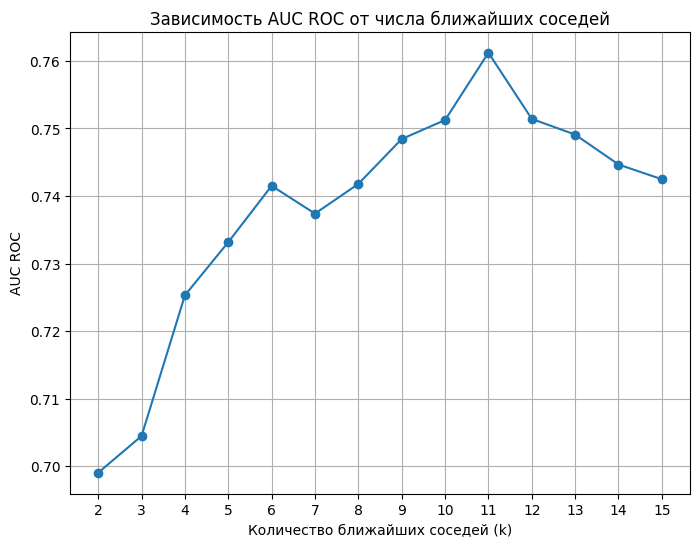

Оптимальное число ближайших соседей по AUC ROC: 11


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Загрузка датасета

# Определение признаков и целевой переменной
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Разделение данных: тестовая выборка составляет 33% от исходной, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Задаем диапазон значений k от 2 до 15 включительно
k_values = list(range(2, 16))
auc_scores = []

# Итерация по значениям k для оценки AUC ROC
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model.fit(X_train, y_train)
    # Получаем вероятности для класса 1
    y_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    auc_scores.append(auc)

# Построение графика изменения метрики AUC ROC при увеличении числа ближайших соседей
plt.figure(figsize=(8,6))
plt.plot(k_values, auc_scores, marker='o', linestyle='-')
plt.xlabel('Количество ближайших соседей (k)')
plt.ylabel('AUC ROC')
plt.title('Зависимость AUC ROC от числа ближайших соседей')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Определение оптимального числа соседей по метрике AUC ROC
optimal_k = k_values[np.argmax(auc_scores)]
print("Оптимальное число ближайших соседей по AUC ROC:", optimal_k)
